In [2]:
#Biblioteca para importar o banco de dados
from google.colab import files
uploaded = files.upload()

Saving airline-passengers.csv to airline-passengers.csv


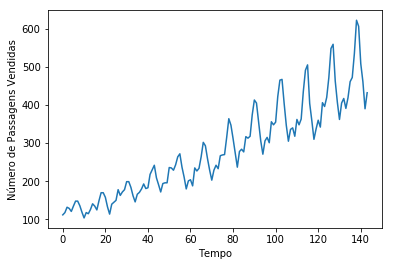

In [3]:
import pandas #utilizada para tratar os dataframes
import matplotlib.pyplot as plt  # utilizada para criar os gráficos
dataset = pandas.read_csv('airline-passengers.csv', usecols=[1], engine='python') #lê o banco de dados dos passageiros
plt.plot(dataset)  #realiza o plot do gráfico
plt.xlabel("Tempo")
plt.ylabel("Número de Passagens Vendidas")
plt.show()

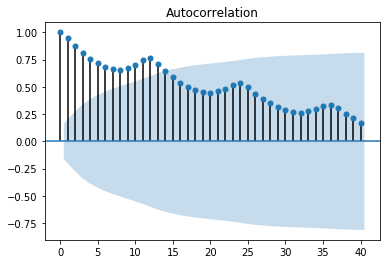

In [0]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(dataset.values.squeeze(), lags=40)
plt.show()

In [0]:
#bibliotecas utilizadas para a construção dos modelos de previsão de vendas de passagens
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [0]:
# normalizzação do banco de dados, necessário para que os algoritmos possam ter um comportamento mais "previsível"
scaler = MinMaxScaler(feature_range=(0, 1)) #cria o objeto que realiza a normalização dos dados por meio dos valores mínimos e máximos
dataset = scaler.fit_transform(dataset) # aplica a escala

In [0]:
# Divide o conjunto de dados em treinamento e teste 
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [0]:
#Cria a matriz necessária para a entrada de dados 
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [0]:
#cria o reshape para que os dados estejam em um formato ideal para entrada
look_back = 1  # será utilizado apenas um passo anterior para a previsão do futuro
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [0]:
# cria o modelo utilizando redes recorrentes e o LSTM
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


W0726 01:22:44.136959 139873761974144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0726 01:22:44.165850 139873761974144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0726 01:22:44.169276 139873761974144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0726 01:22:44.382484 139873761974144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
#realiza o treinamento o modelo de previsão
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

W0726 01:22:44.607672 139873761974144 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0726 01:22:45.254193 139873761974144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0726 01:22:45.335656 139873761974144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/100
 - 1s - loss: 0.0489
Epoch 2/100
 - 0s - loss: 0.0251
Epoch 3/100
 - 0s - loss: 0.0193
Epoch 4/100
 - 0s - loss: 0.0179
Epoch 5/100
 - 0s - loss: 0.0173
Epoch 6/100
 - 0s - loss: 0.0162
Epoch 7/100
 - 0s - loss: 0.0154
Epoch 8/100
 - 0s - loss: 0.0146
Epoch 9/100
 - 0s - loss: 0.0137
Epoch 10/100
 - 0s - loss: 0.0128
Epoch 11/100
 - 0s - loss: 0.0119
Epoch 12/100
 - 0s - loss: 0.0109
Epoch 13/100
 - 0s - loss: 0.0100
Epoch 14/100
 - 0s - loss: 0.0090
Epoch 15/100
 - 0s - loss: 0.0081
Epoch 16/100
 - 0s - loss: 0.0072
Epoch 17/100
 - 0s - loss: 0.0062
Epoch 18/100
 - 0s - loss: 0.0054
Epoch 19/100
 - 0s - loss: 0.0047
Epoch 20/100
 - 0s - loss: 0.0041
Epoch 21/100
 - 0s - loss: 0.0036
Epoch 22/100
 - 0s - loss: 0.0031
Epoch 23/100
 - 0s - loss: 0.0028
Epoch 24/100
 - 0s - loss: 0.0025
Epoch 25/100
 - 0s - loss: 0.0024
Epoch 26/100
 - 0s - loss: 0.0022
Epoch 27/100
 - 0s - loss: 0.0022
Epoch 28/100
 - 0s - loss: 0.0021
Epoch 29/100
 - 0s - loss: 0.0021
Epoch 30/100
 - 0s - lo

In [0]:
# realiza as previsões
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


In [0]:
# coloca os dados no formato original
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [0]:
# Calcula o MSE 
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score de Treinamento: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score de Teste: %.2f RMSE' % (testScore))

Score de Treinamento: 22.96 RMSE
Score de Teste: 49.32 RMSE


In [0]:
# Realiza a mudança dos dados para a previsão
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
#shift para os dados de teste
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

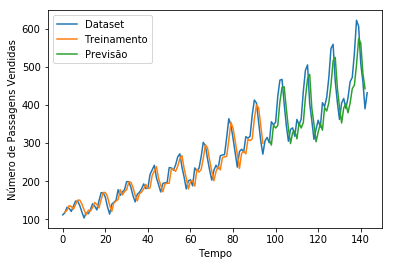

In [0]:
# Realiza o plot dos dados de previsão e o real
plt.plot(scaler.inverse_transform(dataset),label='Dataset')
plt.plot(trainPredictPlot, label='Treinamento')
plt.plot(testPredictPlot,label='Previsão')
plt.xlabel("Tempo")
plt.ylabel("Número de Passagens Vendidas")
plt.legend()
plt.show()